In [1]:
#import packages
import csv 
import os
import pandas as pd
import numpy as np
from pylab import *
import glob
import matplotlib
from scipy import stats
from matplotlib.ticker import MaxNLocator

%matplotlib inline

In [2]:
filenames=sorted(glob.glob('*08.csv'))#filenames all spectra

od = [pd.read_csv(file,delimiter=';',skiprows=2,header=None) for file in filenames] #import spectra
od=np.array(od) #to array

for i in range(1,len(od)):
    od[i].iloc[:,1:]=od[i].iloc[:,1:]*2 #double all absorbances (2:1 dilution)

od750=od[10][od[10][0]==750] #only OD750

od750=np.array(od750)[0,1:] #to array

In [3]:
data=pd.read_csv('bsa_standard.csv',skiprows=2,delimiter=';',header=None) #read standard curve data

data=np.array(data) #to array

array=np.vstack([[data[0]],[0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30,32.5,35]]) #BSA concentrations

array[0,0]=0


In [4]:
A = np.vstack([array[1], np.ones(len(array[1]))]).T  #stack array

In [5]:
m, c = np.linalg.lstsq(A,array[0],rcond=1)[0] #least squares fit

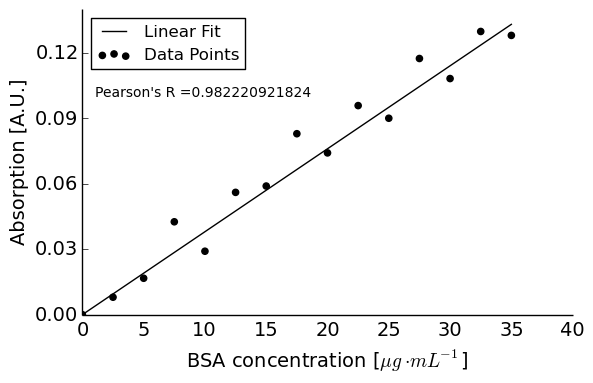

In [6]:
ax = plt.subplot(111)

ax.scatter(array[1],array[0],color='k',label='Data Points') #scatterplot
ax.plot(array[1],m*array[1], color='k', label='Linear Fit') #plot fit

#format plot
legend(loc='best')
plt.xlabel('BSA concentration [$\mu g \cdot mL^{-1}$]',fontsize=14)
plt.ylabel('Absorption [A.U.]',fontsize=14)
plt.tight_layout()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
p=stats.pearsonr(array[1],array[0])[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('none')

ax.yaxis.set_major_locator(MaxNLocator(5))

plt.ylim(0)
plt.xlim(0)
plt.text(1,0.1,'Pearson\'s R ='+str(p))

#save plot
#plt.savefig('BSA_Standardcurve.png',bbox_inches='tight',dpi=1000)



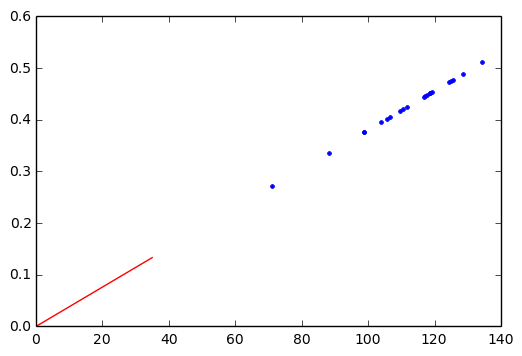

In [7]:
#read protein absorbances
prot=pd.read_csv('Protein_Lowry Assay_2308.csv',skiprows=2,delimiter=';',header=None)

proti=np.array(prot) #to array
proti=proti[0,1:]/od750 #normalize

plot(array[1], m*array[1], 'r', label='fitted line') #plot fit
plot((proti)/m,proti,'.') #plot data
#print proti
conc=(proti)/m #protein concentration

In [8]:
x_value=[]
means=[]
err=[]
i=0
x=0

#get means and std of biological triplicates
while i < len(conc):
    x_value.append([x+1]*len(conc[i:i+3]))
    means.append(conc[i:i+3].mean())
    err.append(conc[i:i+3].std())
    i+=3
    x+=1

In [9]:
#labels
labeli=['$\Delta shc$_EVC',
 '$\Delta shc$_SQS1',
 'GT-V_EVC',
 'GT-V_SQS',
 'GT-U_EVC',
 'GT-U_SQS',
 '$\Delta shc$_SQS2']

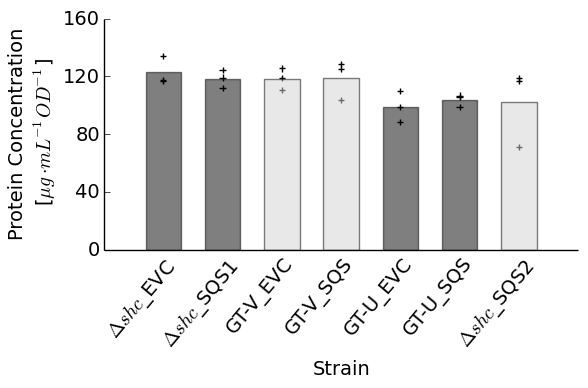

In [10]:
i=0
x=1

ax = plt.subplot(111)

while i < len(conc):
    ax.scatter([x]*3,conc[i:i+3],marker='+',c='k') #scatter data points
    i+=3
    x+=1

#barplot
ax.bar(np.array(range(1,len(means)+1))-0.3,means,color=['k','k','lightgray','lightgray','k','k','lightgray'],width=0.6, alpha=0.5)

#format plot
plt.yticks(fontsize=14)
plt.xticks(np.array(range(1,len(means)+1))-0.35, labeli,rotation=50,fontsize=14) #xticks
plt.tight_layout()
plt.ylabel('Protein Concentration \n [$\mu g \cdot mL^{-1} OD^{-1}$]',fontsize=14)
plt.xlabel('Strain',fontsize=14)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('none')

ax.yaxis.set_major_locator(MaxNLocator(5))

plt.ylim(0)

plt.tight_layout()

#save plot
#plt.savefig('protein.png',bbox_inches='tight',dpi=1000)
